In [6]:
import tensorflow as tf
#import pandas as pd
import numpy as np
import librosa
import os
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
random_File = "./GTZAN/Data/genres_original/blues/blues.00000.wav"

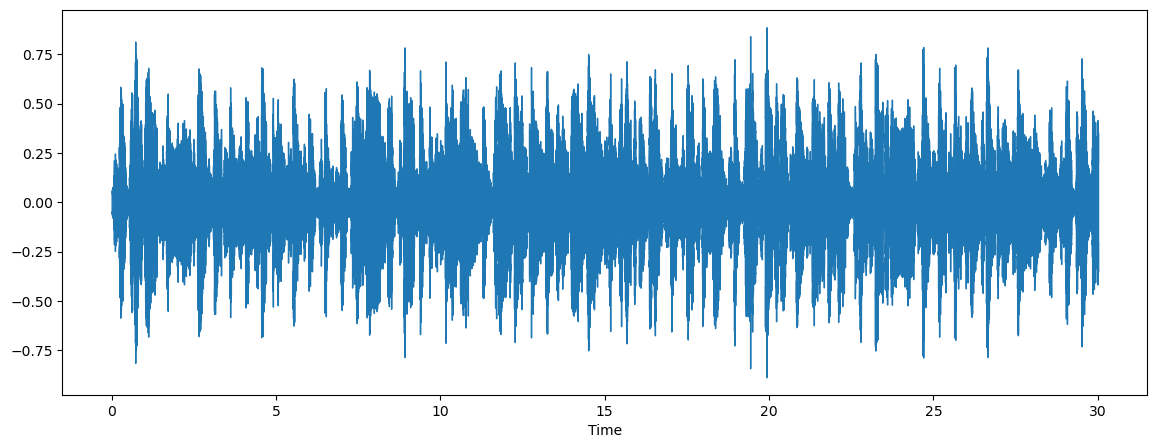

In [8]:
x, sr = librosa.load(random_File, sr = 44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(x, sr = sr)

In [9]:
from IPython.display import Audio
Audio(data = x, rate = sr)

# Data Visualisation on chunks (melspectrograph)

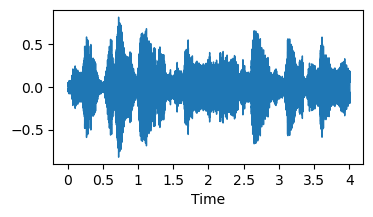

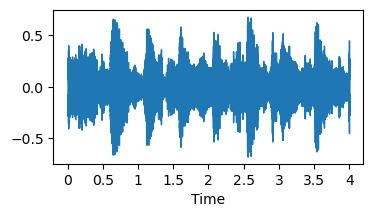

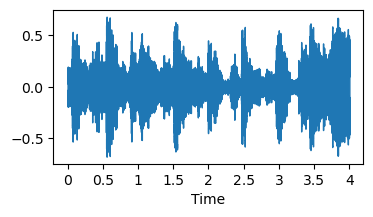

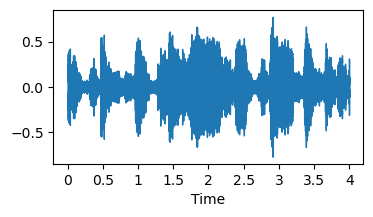

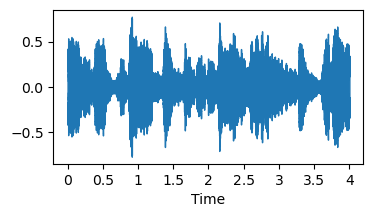

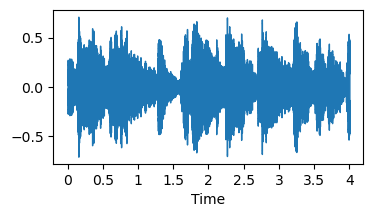

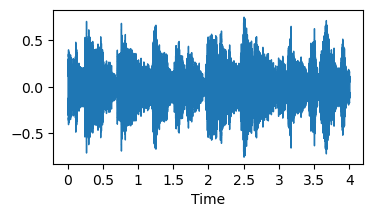

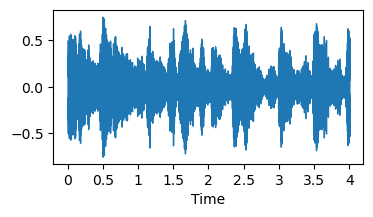

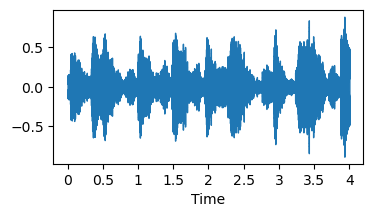

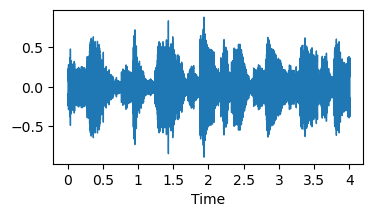

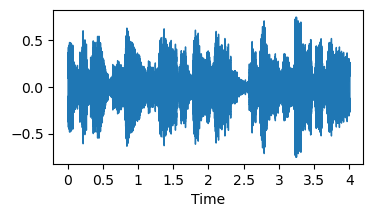

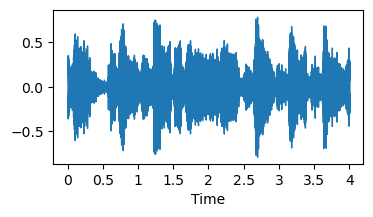

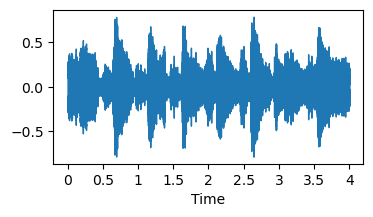

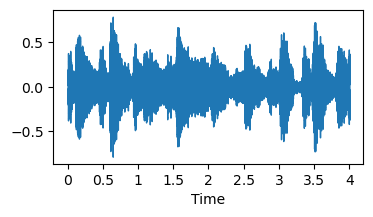

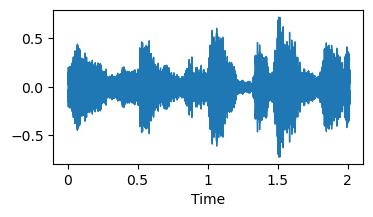

In [11]:
audio_path = random_File
y, sr = librosa.load(audio_path, sr = None) # sr = Sampling rate

#setting the duration
chunk_duration = 4
overlap = 2

#Conversion of durations to samples
chunk_samples = chunk_duration*sr
overlap_samples = overlap*sr

num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# Iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples
    
    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()

# MelspectroGram Visualisation

In [12]:
def plot_melspectrogram(y, sr):
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()

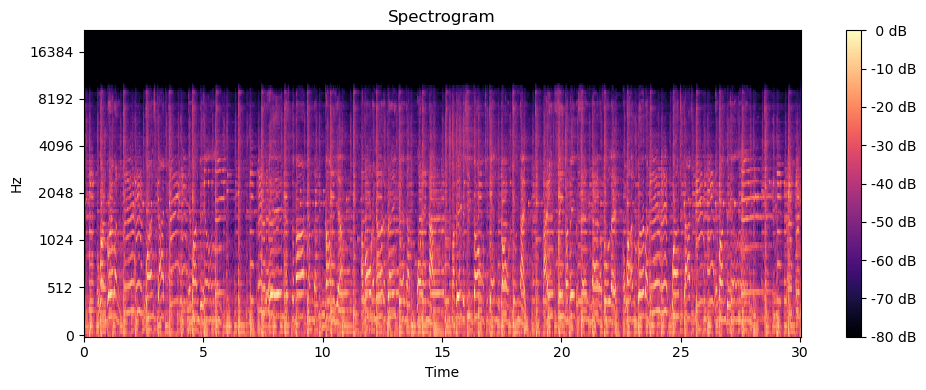

In [13]:
y, sr = librosa.load(random_File, sr = 44100)
plot_melspectrogram(y, sr)

In [14]:
def plot_melspectrogram_chunks(y,sr):
    #define the duration of each chunk and overlap
    chunk_duration = 4
    overlap_duration = 2
    
    #Convert duration to sample
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    
    num_chunks = int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
    
    #iterate over each chunks
    for i in range(num_chunks):
        #Calculate start and end indices of the chunk
        start = i*(chunk_samples-overlap_samples)
        end = start+chunk_samples
        #Extract the chunk audio
        chunk = y[start:end]
        #Melspectrogram part
        spectrogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
        #Visualize the spectrogram
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("Spectrogram")
        plt.tight_layout()
        plt.show()

In [15]:
y,sr = librosa.load(random_File,sr=44100)

(128, 345)


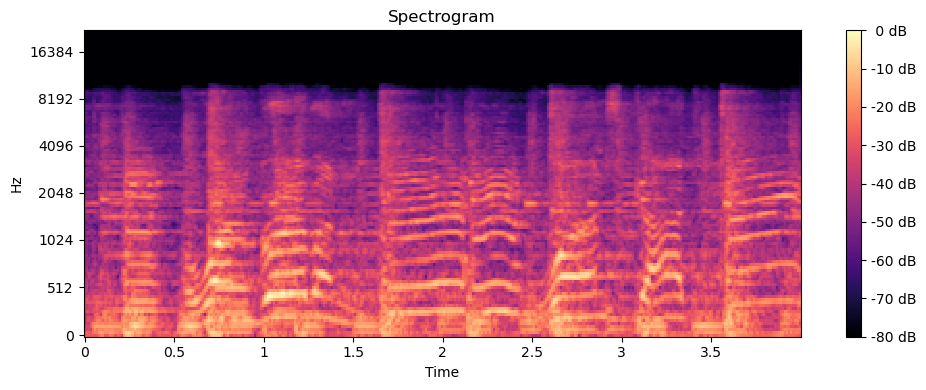

(128, 345)


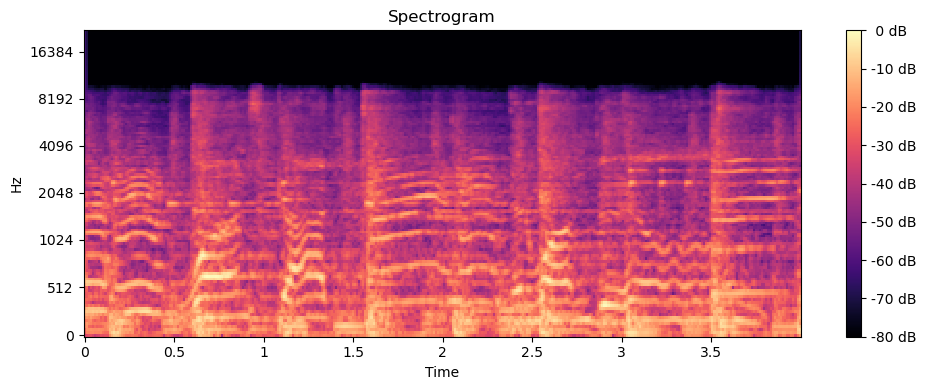

(128, 345)


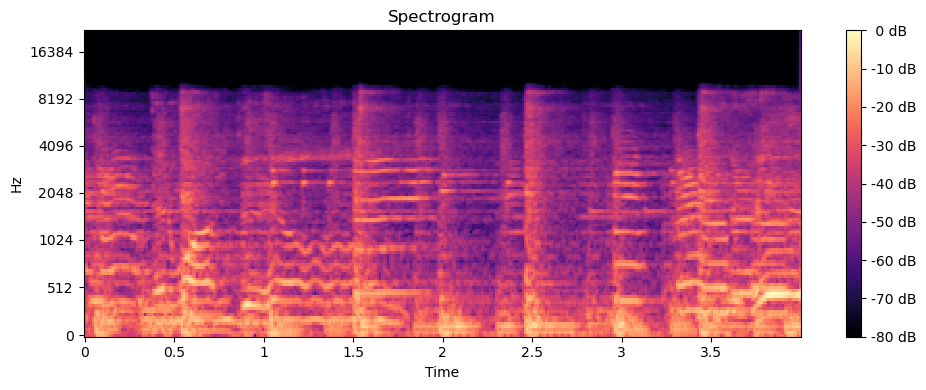

(128, 345)


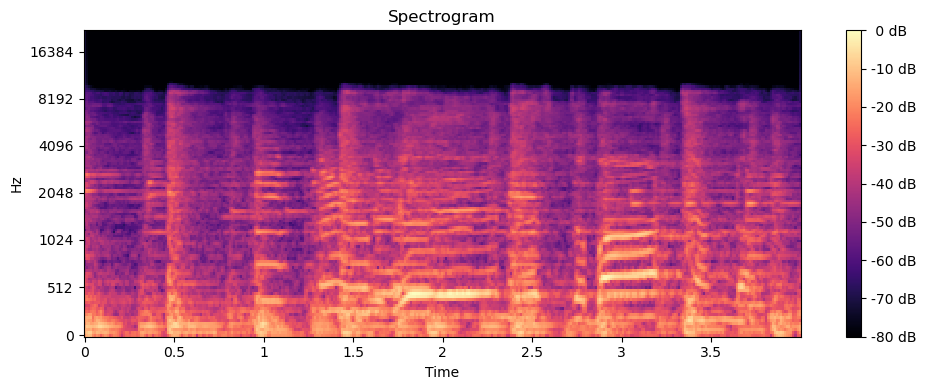

(128, 345)


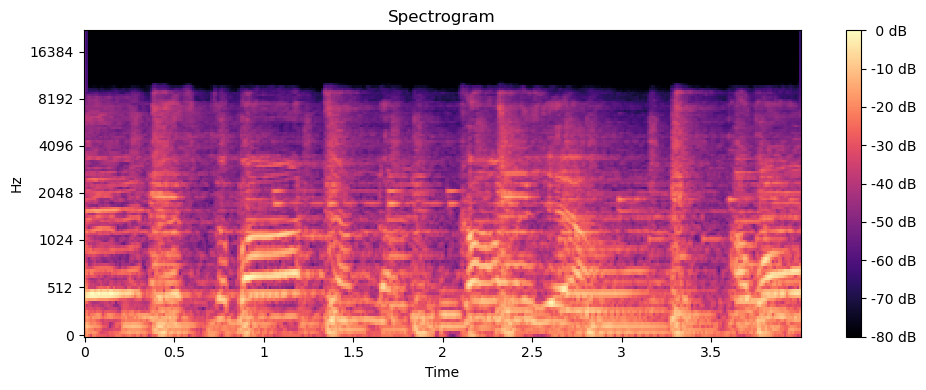

(128, 345)


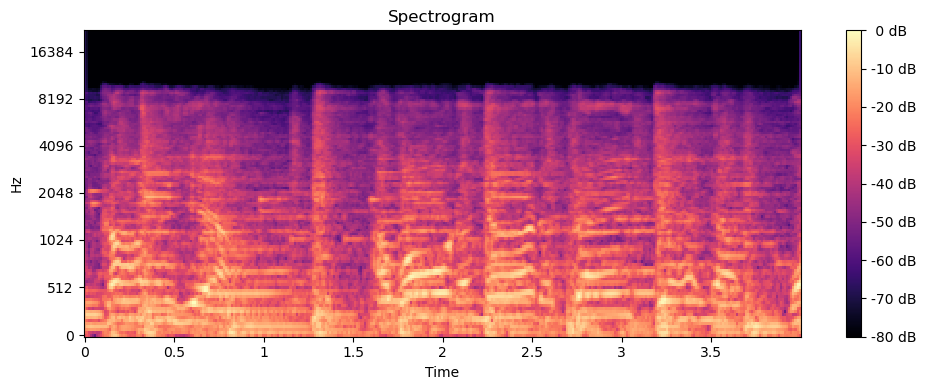

(128, 345)


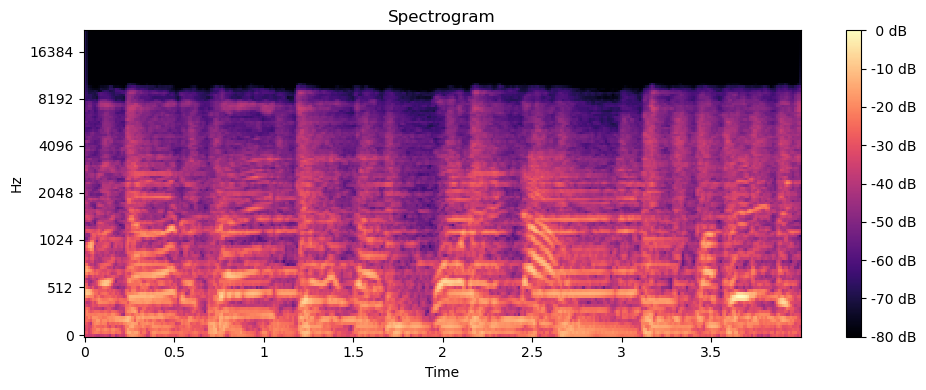

(128, 345)


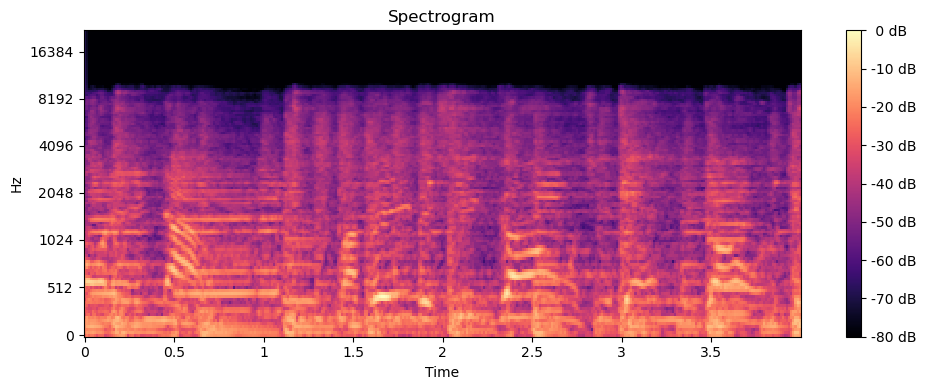

(128, 345)


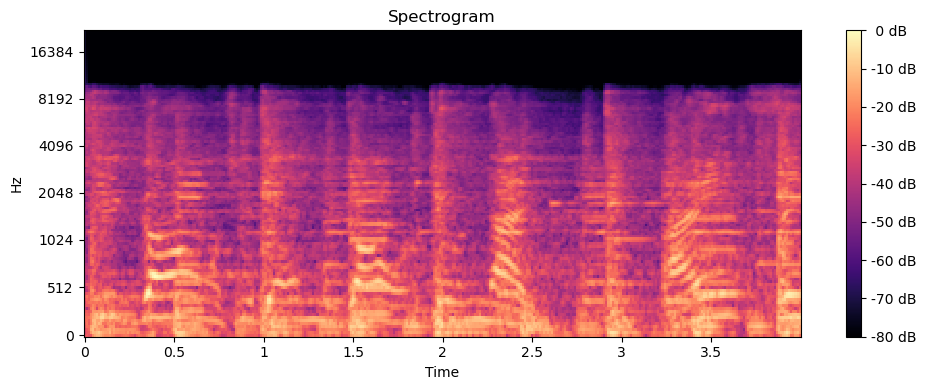

(128, 345)


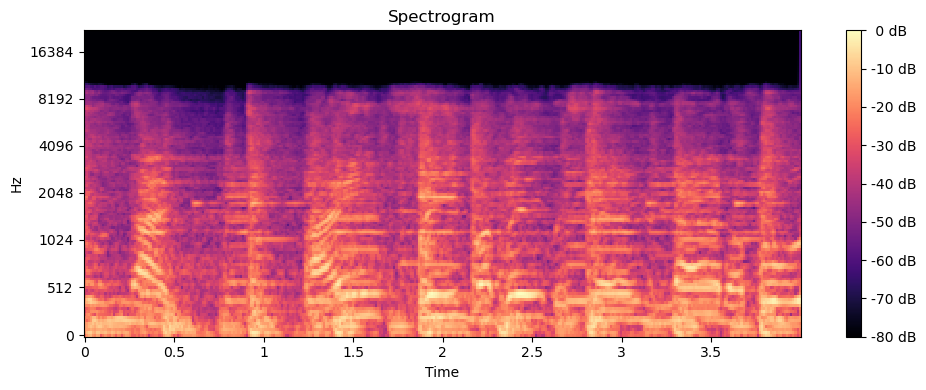

(128, 345)


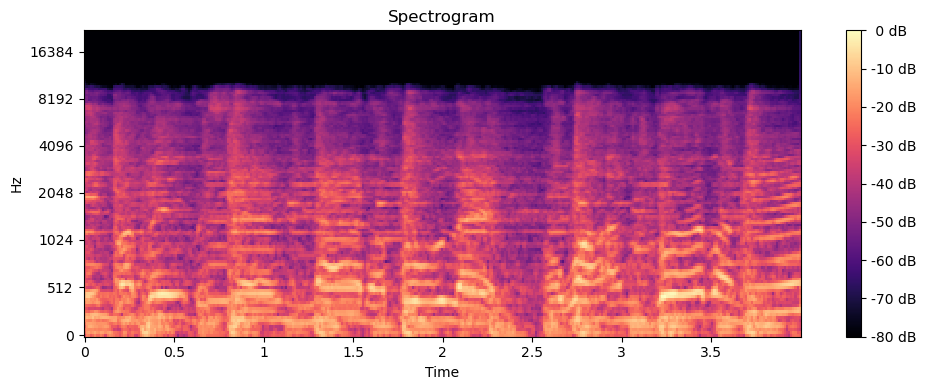

(128, 345)


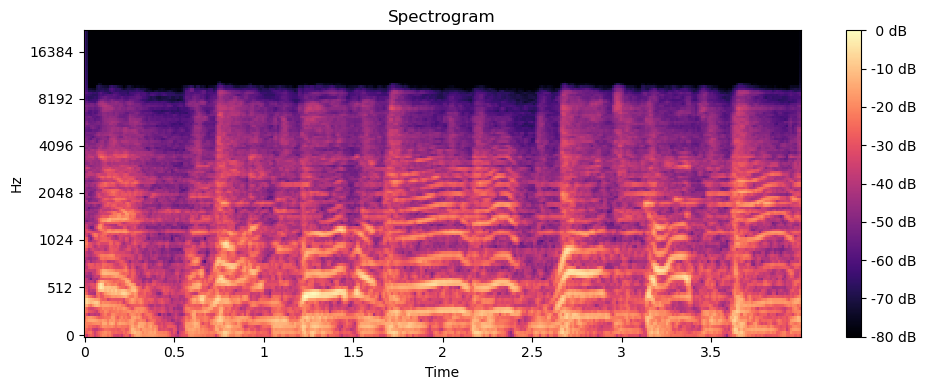

(128, 345)


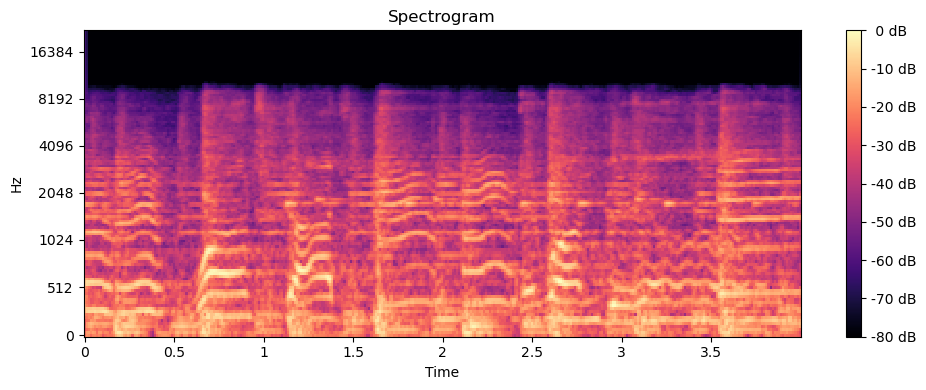

(128, 345)


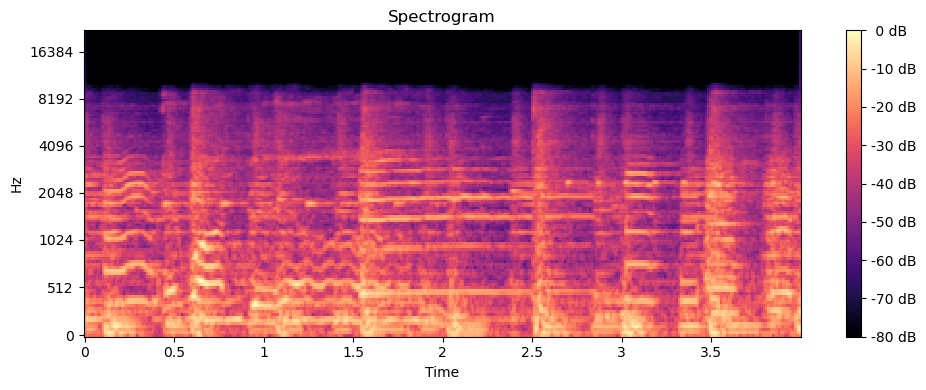

(128, 174)


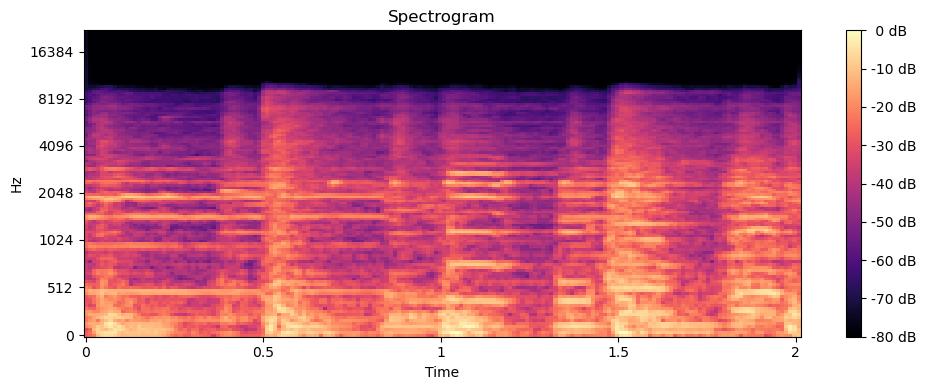

In [16]:
plot_melspectrogram_chunks(y,sr)

# Final Data Processing

In [17]:
data_dir = "./GTZAN/Data/genres_original"
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [21]:
import os
import numpy as np
import librosa
from tensorflow.image import resize

def load_and_preprocess_data(data_dir, classes, target_shape=(150,150)):
    data = []
    labels = []

    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing --", class_name)

        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                try:
                    audio_data, sample_rate = librosa.load(file_path, sr=None)
                except Exception as e:
                    print(f"⚠️ Skipping {file_path}: {e}")
                    continue

                chunk_duration = 4
                overlap_duration = 2
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / 
                                         (chunk_samples - overlap_samples))) + 1

                for i in range(num_chunks):
                    start = i * (chunk_samples - overlap_samples)
                    end = start + chunk_samples
                    chunk = audio_data[start:end]
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                    data.append(mel_spectrogram)
                    labels.append(i_class)

    return np.array(data), np.array(labels)


In [22]:
data,labels = load_and_preprocess_data(data_dir,classes)

Processing -- blues
Processing -- classical
Processing -- country
Processing -- disco
Processing -- hiphop
Processing -- jazz


/tmp/ipykernel_1648/2739483394.py:18: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sample_rate = librosa.load(file_path, sr=None)
/home/divij1524/miniconda3/envs/tfgpu/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


⚠️ Skipping ./GTZAN/Data/genres_original/jazz/jazz.00054.wav: 
Processing -- metal
Processing -- pop
Processing -- reggae


2025-10-26 23:09:10.823904: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:501] Allocator (GPU_0_bfc) ran out of memory trying to allocate 87.9KiB (rounded to 90112)requested by op ResizeBilinear
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2025-10-26 23:09:10.824202: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1058] BFCAllocator dump for GPU_0_bfc
2025-10-26 23:09:10.824213: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1065] Bin (256): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2025-10-26 23:09:10.824217: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1065] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2025-10-26 23:09:10.824221: I externa

ResourceExhaustedError: {{function_node __wrapped__ResizeBilinear_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[1,150,150,1] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:ResizeBilinear] name: 

In [51]:
data_path = "/mnt/c/Users/divij/Jupyter_Notebooks/GTZAN/Data/genres_original"
genres = os.listdir(data_path)

#Load and preprocess audio data

In [52]:
X = []
y = []

for genre in os.listdir(data_path):
    genre_path = os.path.join(data_path, genre)
    if not os.path.isdir(genre_path):
        continue

    for file in os.listdir(genre_path):
        file_path = os.path.join(genre_path, file)
        try:
            signal, sr = librosa.load(file_path, sr=22050)
            mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40)
            mfccs_mean = np.mean(mfccs.T, axis=0)
            X.append(mfccs_mean)
            y.append(genre)
        except Exception as e:
            print(f"Skipping {file} due to error: {e}")

# convert to numpy arrays AFTER the loop finishes
X = np.array(X)
y = np.array(y)
print("✅ Feature extraction complete! Shapes:", X.shape, y.shape)

/tmp/ipykernel_563/2502238320.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=22050)
/home/divij1524/miniconda3/envs/tfgpu/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Skipping jazz.00054.wav due to error: 
✅ Feature extraction complete! Shapes: (999, 40) (999,)


#Train-test split

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Encode genre names to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert integer labels to one-hot encoding
y_categorical = to_categorical(y_encoded)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("Classes:", label_encoder.classes_)

X_train: (799, 40)
y_train: (799, 10)
Classes: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


# Building the neural Network

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(genres), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/home/divij1524/miniconda3/envs/tfgpu/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 256)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,682 (174.54 KB)

 Trainable params: 44,682 (174.54 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',   # watch validation loss
    patience=10,          # stop if no improvement for 10 epochs
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,           # it will stop earlier if needed
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.1665 - loss: 12.8910 - val_accuracy: 0.2400 - val_loss: 3.6736
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2466 - loss: 5.8137 - val_accuracy: 0.2900 - val_loss: 2.1299
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2766 - loss: 2.9739 - val_accuracy: 0.2700 - val_loss: 2.0266
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2453 - loss: 2.3161 - val_accuracy: 0.2650 - val_loss: 2.0423
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2979 - loss: 2.0864 - val_accuracy: 0.2900 - val_loss: 2.0419
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3029 - loss: 2.0461 - val_accuracy: 0.3100 - val_loss: 1.9668
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2954 - loss: 2.0101 - val_accuracy: 0.3250 - val_loss: 1.9119
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3217 - loss: 1.9335 - val_accuracy: 0.3650

# Accuracy and loss graph

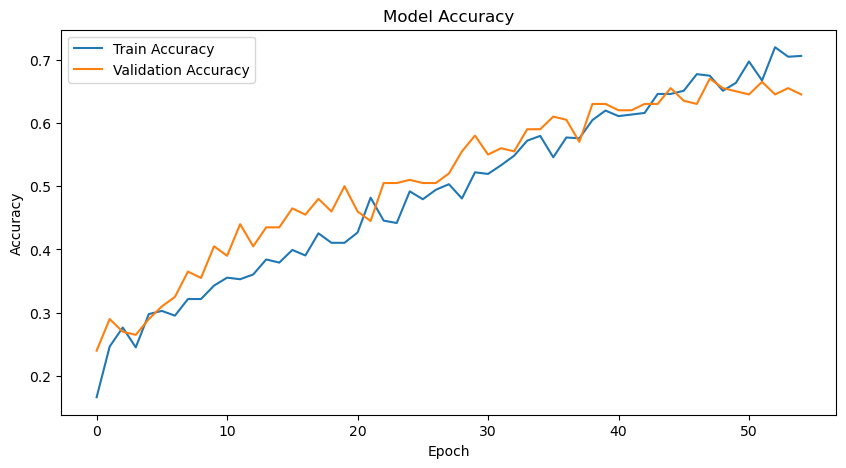

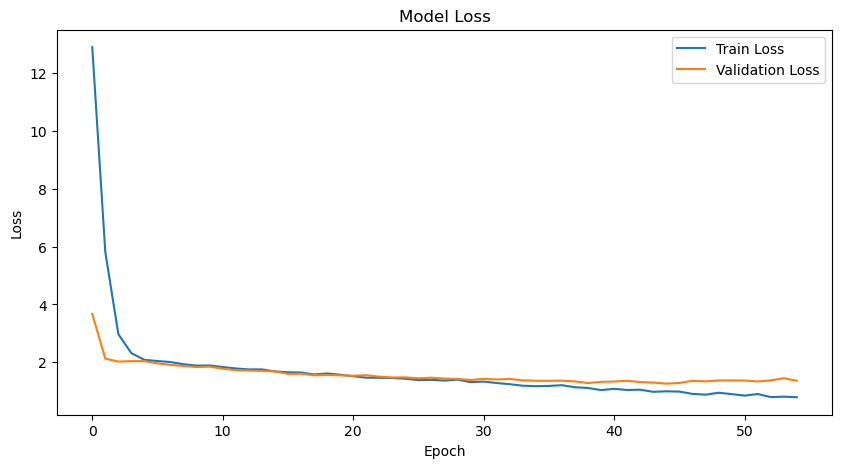

In [57]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


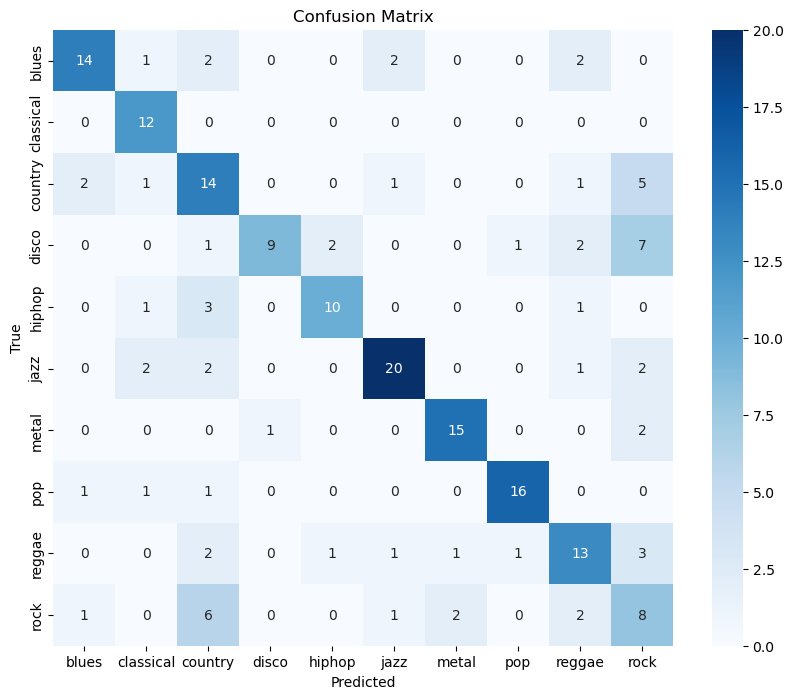

              precision    recall  f1-score   support

       blues       0.78      0.67      0.72        21
   classical       0.67      1.00      0.80        12
     country       0.45      0.58      0.51        24
       disco       0.90      0.41      0.56        22
      hiphop       0.77      0.67      0.71        15
        jazz       0.80      0.74      0.77        27
       metal       0.83      0.83      0.83        18
         pop       0.89      0.84      0.86        19
      reggae       0.59      0.59      0.59        22
        rock       0.30      0.40      0.34        20

    accuracy                           0.66       200
   macro avg       0.70      0.67      0.67       200
weighted avg       0.69      0.66      0.66       200



In [58]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=genres, yticklabels=genres)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Detailed report
print(classification_report(y_true, y_pred_classes, target_names=genres))


In [59]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6550 - loss: 1.2647 
Test Loss: 1.2647
Test Accuracy: 0.6550


In [60]:
# Predict probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Convert one-hot y_test back to class indices
y_true_classes = np.argmax(y_test, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


              precision    recall  f1-score   support

       blues       0.78      0.67      0.72        21
   classical       0.67      1.00      0.80        12
     country       0.45      0.58      0.51        24
       disco       0.90      0.41      0.56        22
      hiphop       0.77      0.67      0.71        15
        jazz       0.80      0.74      0.77        27
       metal       0.83      0.83      0.83        18
         pop       0.89      0.84      0.86        19
      reggae       0.59      0.59      0.59        22
        rock       0.30      0.40      0.34        20

    accuracy                           0.66       200
   macro avg       0.70      0.67      0.67       200
weighted avg       0.69      0.66      0.66       200



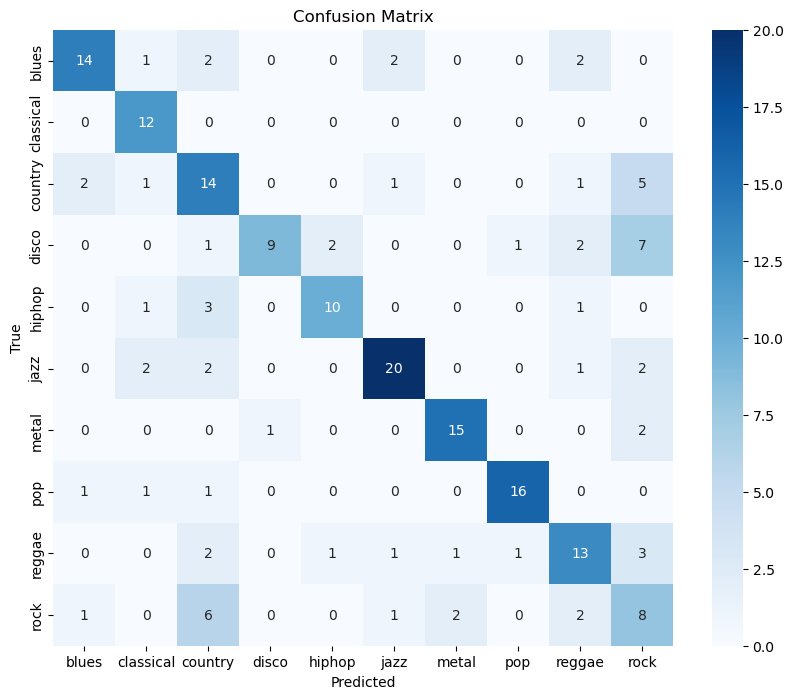

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [69]:
import librosa
import numpy as np

# --- Define the number of MFCCs used during training ---
n_mfcc_trained = 40

# --- Load the single audio file ---
file_path = "GTZAN/Data/genres_original/blues/blues.00000.wav" # Or any other file path
try:
    signal, sr = librosa.load(file_path, sr=22050)

    # --- Extract the SAME number of MFCCs as during training ---
    mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc_trained)

    # --- Calculate the MEAN across time, just like during training ---
    mfccs_mean = np.mean(mfccs.T, axis=0)

    # --- Reshape for the model (add batch dimension) ---
    # The model expects shape (batch_size, num_features), so (1, 40)
    mfccs_input = np.expand_dims(mfccs_mean, axis=0)

    # --- Predict ---
    pred_prob = model.predict(mfccs_input)
    pred_class = np.argmax(pred_prob)
    pred_genre = label_encoder.inverse_transform([pred_class])[0] # Use the label_encoder fitted during training

    print(f"Predicted Genre: {pred_genre}")

except Exception as e:
    print(f"Error processing {file_path}: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Genre: rock
